In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [4]:
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).
# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100
# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoded labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

Epoch 1/2
1563/1563 [==============================] - 76s 48ms/step - loss: 3.9376 - accuracy: 0.0951 - val_loss: 3.4893 - val_accuracy: 0.1713
Epoch 2/2
1563/1563 [==============================] - 72s 46ms/step - loss: 3.3117 - accuracy: 0.1998 - val_loss: 3.1333 - val_accuracy: 0.2389
313/313 - 3s - loss: 3.1333 - accuracy: 0.2389 - 3s/epoch - 11ms/step

Test accuracy: 0.23890000581741333


In [7]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming n_hidden_1, n_hidden_2, num_classes are defined earlier in your code

class NeuralNet(tf.keras.Model):
    # Set Layers.
    def __init__(self):
        super(NeuralNet, self).__init__()

        # First fully-connected hidden Layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)

        # Second fully-connected hidden Layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)

        # Output layer.
        self.out = layers.Dense(num_classes, activation=tf.nn.softmax)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)

        if not is_training:
            # tf cross entropy expects logits without softmax,
            # so only apply softmax when not training.
            x = tf.nn.softmax(x)

        return x

# Build neural network model.
neural_net = NeuralNet()

In [9]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
import tensorflow as tf

# Cross-Entropy Loss
def cross_entropy_loss(x, y):
    # Convert labels to int64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)

    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)

    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy Metric
def accuracy(y_pred, y_true):
    # Predicted class is the index of the highest score in the prediction vector.
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [10]:
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        # Forward pass
        pred = neural_net(x, is_training=True)

        # Compute Loss
        loss = cross_entropy_loss(pred, y)

    # Variables to update, i.e., trainable variables
    trainable_variables = neural_net.trainable_variables

    # Compute gradients
    gradients = g.gradient(loss, trainable_variables)

    # Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, trainable_variables))

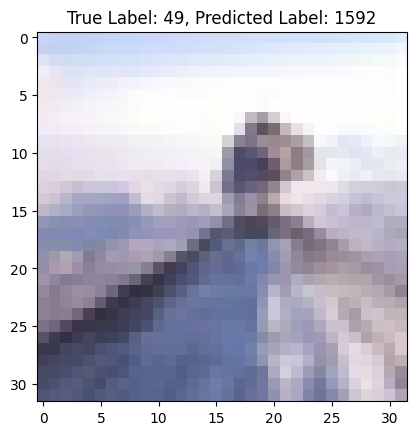

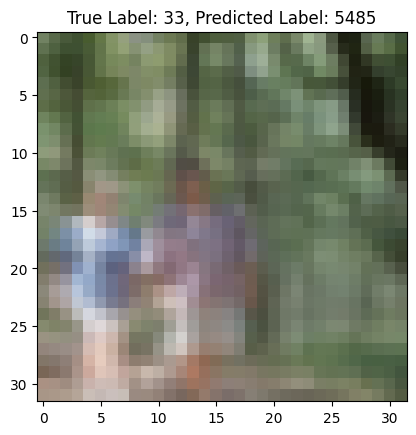

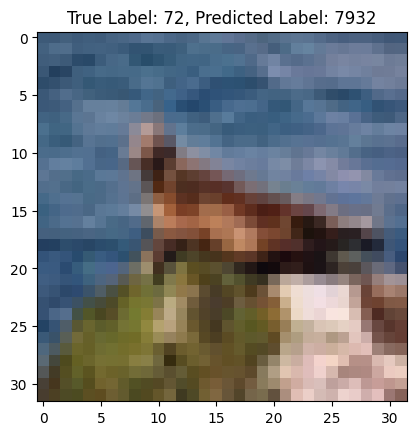

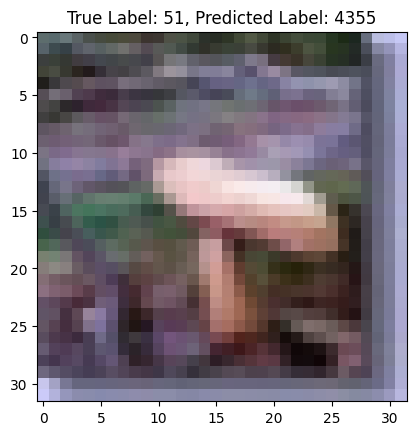

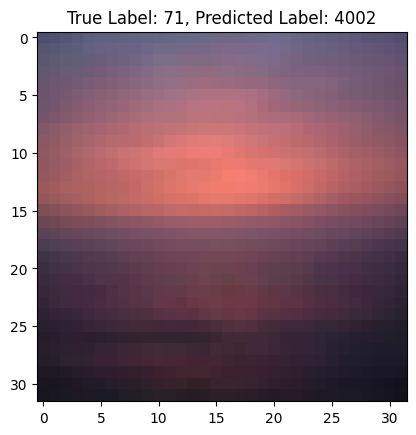

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a neural network model named 'neural_net' and the test set 'x_test'
n_images = 5
test_images = x_test[:n_images]
true_labels = y_test[:n_images]

# Predictions from the model
predictions = neural_net(test_images)

# Display images and model predictions
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [32, 32, 3]), cmap='gray')

    plt.title(f'True Label: {np.argmax(true_labels[i])}, Predicted Label: {np.argmax(predictions[i].numpy())}')
    plt.show()